# Environment Setting

In [ ]:
# Check for listed CPU/GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7557039127056887445
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15692777408
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16058530522218700630
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [ ]:
# Check for selected GPU
!nvidia-smi

Wed Feb  3 10:06:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    32W / 250W |    359MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Understanding directory in Google Colab
import os
print(os.getcwd())

/content


In [ ]:
# Understanding directory in Google Colab
cd gdrive/MyDrive
ls

SyntaxError: ignored

In [ ]:
# Mount google drive to our notebook
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Understanding directory in Google Colab
!ls gdrive/MyDrive

'Autonomous Tram Research'
'Colab Notebooks'
'EL3215 - Praktikum Sistem Kendali 2020 2021 - Ganjil'
'EL4230 - DSKC [Tutorial]'
'IF6080 - Advanced Machine Learning'
'Meet Recordings'
'Personal Docs'
'Shared Folder'


In [ ]:
# Check for tensorflow version
import tensorflow as tf
print(tf.__version__)

2.4.1


# Example 1: Simple Linear Regression

In [ ]:
# Import numpy packages and linear regression classes from scikit-learn linear model
import numpy as np
from sklearn.linear_model import LinearRegression

# Import matplotlib for visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Create input/regressor and output/predictor
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([2, 20, 10, 32, 8, 41])

In [ ]:
# Check the shape of regressor and predictor
print (x)
print (y)

[ 5 15 25 35 45 55]
[ 2 20 10 32  8 41]


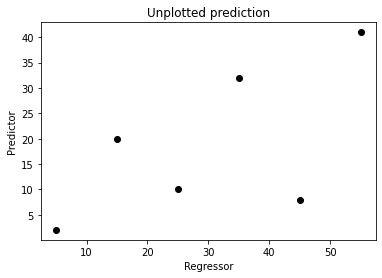

In [ ]:
# Plot regressor and predictor
plt.scatter(x, y,  color='black')
plt.title('Unplotted prediction')
plt.xlabel('Regressor')
plt.ylabel('Predictor')
plt.show()

In [ ]:
# To Do: Create linear regression model
model = LinearRegression()

In [ ]:
# To Do: Fit the data to the model. Error?
model.fit(x, y)

ValueError: ignored

In [ ]:
# To Do: Check the type of variable
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(6, 1)


In [ ]:
# To Do: Reshape regressor to meet the requirement
x = x.reshape((-1, 1))

In [ ]:
# To Do: Train the reshaped data to model
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# To Do: Calculate b0 and b1
b0 = model.intercept_
print('intercept: ', b0)
b1 = model.coef_
print('slope: ', b1)

intercept:  3.319047619047618
slope:  [0.51714286]


In [ ]:
# To Do: Calculate performance metric
R2 = model.score(x, y)
print('coefficient of determination: ', R2)

coefficient of determination:  0.40880560697127877


In [ ]:
# To Do: Calculate predictions using regressor data as input
y_pred = model.predict(x)
y_pred = y_pred.reshape((-1, 1))
print('predicted response: ', y_pred, sep='\n')


#[ 5 15 25 35 45 55]
#[ 2 20 10 32  8 41]

predicted response: 
[[ 5.9047619 ]
 [11.07619048]
 [16.24761905]
 [21.41904762]
 [26.59047619]
 [31.76190476]]


In [ ]:
# To Do: Calculate predictions using b0 and b1, is there any different?
# y = b0 + b1*x
y_pred = model.intercept_ + model.coef_*x
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[[ 5.9047619 ]
 [11.07619048]
 [16.24761905]
 [21.41904762]
 [26.59047619]
 [31.76190476]]


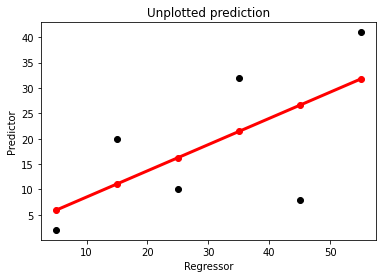

In [ ]:
# To Do: Plot regressor, predictor, and result of prediction
plt.scatter(x, y,  color='black')
plt.scatter(x, y_pred, color='red')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.title('Unplotted prediction')
plt.xlabel('Regressor')
plt.ylabel('Predictor')
plt.show()

In [ ]:
# To Do: Create new input data
x_new = np.arange(5).reshape((-1,1))
x_new[0] = -5
x_new[4] = 70
print(x_new)

[[-5]
 [ 1]
 [ 2]
 [ 3]
 [70]]


In [ ]:
# To Do: Use the trained model to calculate prediction for new data. Is it possible?
y_new = model.predict(x_new)
print(y_new)

[ 0.73333333  3.83619048  4.35333333  4.87047619 39.51904762]


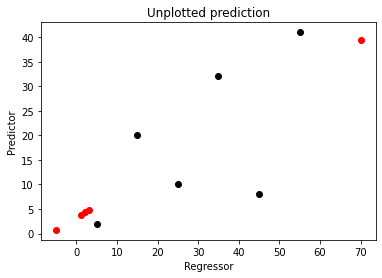

In [ ]:
# To Do: Plot regressor, predictor, and result of prediction for the new data
plt.scatter(x, y,  color='black')
plt.scatter(x_new, y_new, color='red')
#plt.plot(x, y_new, color='red', linewidth=3)
plt.title('Unplotted prediction')
plt.xlabel('Regressor')
plt.ylabel('Predictor')
plt.show()

# Example 2: Multiple Linear Regression

In [ ]:
# Create input (regressor) and output (predictor)
x = [[-5, 2], [5, 4], [15, 6], [25, 8], [35, 10], [45, 12], [55, 14], [65, 16]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)

In [ ]:
# Check the shape of regressor and predictor. Do we need to reshape the regressor?
print(x)
print(y)

[[-5  2]
 [ 5  4]
 [15  6]
 [25  8]
 [35 10]
 [45 12]
 [55 14]
 [65 16]]
[ 4  5 20 14 32 22 38 43]


In [ ]:
# Slice input/regressor to its component
x1 = x[...,0]
x2 = x[...,1]
print(x1)
print(x2)

[-5  5 15 25 35 45 55 65]
[ 2  4  6  8 10 12 14 16]


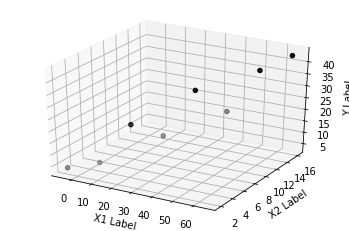

In [ ]:
# Plot regressor and predictor
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='black', marker='o')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
plt.show()

In [ ]:
# To Do: Create linear regression model and fit the data to the model
model = LinearRegression().fit(x, y)

In [ ]:
# To Do: Calculate model score
score = model.score(x,y)
print('coefficient of determinant:', score)

coefficient of determinant: 0.8598984771573605


In [ ]:
# To Do: Calculate b0 and b1
b0 = model.intercept_
print('intercept: ', b0)
b1 = model.coef_
print('slope: ', b1)

# y = b0 + b1[0]*x[0] + b1[1]*x[1]

intercept:  5.43269230769231
slope:  [0.52884615 0.10576923]


In [ ]:
# To Do: Calculate predictions using regressor data as input
y_pred = model.predict(x)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[ 3.   8.5 14.  19.5 25.  30.5 36.  41.5]


In [ ]:
# To Do: Calculate predictions using b0 and b1, is there any different?
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[ 3.   8.5 14.  19.5 25.  30.5 36.  41.5]


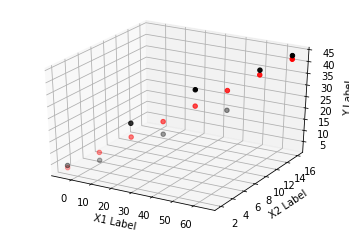

In [ ]:
# To Do: Plot regressor and predictor, and result of prediction
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='black', marker='o')
ax.scatter(x1, x2, y_pred, c='red', marker='o')
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
plt.show()

In [ ]:
# To Do: Define regression function using the obtained value of b0 and b1
def regression(x1, x2):
  pred = model.intercept_ + model.coef_[0]*x1 + model.coef_[1]*x2
  return(pred)

In [ ]:
# To Do: Create grid which cover all regressor
X1, X2 = np.meshgrid(x1, x2)

In [ ]:
# To Do: Pass every points in the grid to the regression function to create a surface of regression
y_plane = np.array(regression(np.ravel(X1), np.ravel(X2)))
Y_plane = y_plane.reshape(X1.shape)

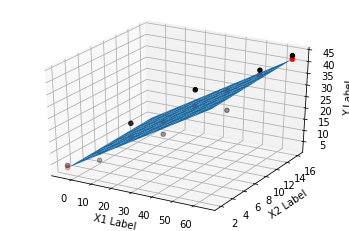

In [ ]:
# To Do: Plot regressor and predictor, and result of prediction. What does the graph tell?
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='black', marker='o')
ax.scatter(x1, x2, y_pred, c='red', marker='o')
ax.plot_surface(X1, X2, Y_plane)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
plt.show()

In [ ]:
# To Do: Create new input data
x_new = np.arange(10).reshape((-1,2))
print(x_new)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [ ]:
# To Do: Slice new input/regressor to its component
x1_new = x_new[...,0]
x2_new = x_new[...,1]

x1_new[3] = 2
x2_new[3] = 2

x1_new[1] = 8
x2_new[1] = 8

print(x1_new)
print(x2_new)

[0 8 4 2 8]
[1 8 5 2 9]


In [ ]:
# To Do: Calculate prediction for new data
y_new = model.predict(x_new)
print(y_new)

[ 5.53846154 10.50961538  8.07692308  6.70192308 10.61538462]


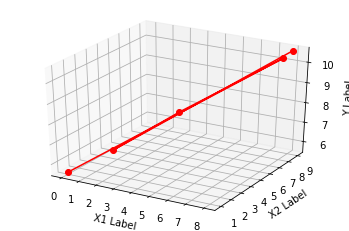

In [ ]:
# To Do: Plot result of new prediction. Does the line concide the surface? (Uncomment plot_surface to see surface)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_new, x2_new, y_new, c='red', marker='o')
#ax.scatter(x1, x2, y_pred, c='red', marker='o')
#ax.plot_surface(X1, X2, Y_plane)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')
plt.show()

# Example 3: Polynomial Regression

In [ ]:
# Import polynomial transformation class from scikit-learn
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Create input/regressor and output/predictor
x = np.array([11, 32, 15, 25, 22, 8]).reshape((-1, 1))
y = np.array([5, 15, 25, 35, 45, 55])

In [ ]:
# To Do: Create polynomial features 
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [ ]:
# To Do: Fit the data to transformer
transformer.fit(x)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [ ]:
# To Do: transform input data for polynomial
x_ = transformer.transform(x)

In [ ]:
# To Do: Check the shape of regressor and predictor
print(x)
print(x_)

[[11]
 [32]
 [15]
 [25]
 [22]
 [ 8]]
[[  11.  121.]
 [  32. 1024.]
 [  15.  225.]
 [  25.  625.]
 [  22.  484.]
 [   8.   64.]]


In [ ]:
# To Do: Fit the transofrmed data to the model
model = LinearRegression().fit(x_, y)

In [ ]:
# To Do: Calculate model score
R2 = model.score(x_, y)
print('coefficient of determination: ', R2)

coefficient of determination:  0.0535714285714286


In [ ]:
# To Do: Calculate b0 and b1
b0 = model.intercept_
print('intercept: ', b0)
b1 = model.coef_
print('slope : ', b1)

intercept:  27.703683035714334
slope :  [ 0.84402902 -0.03208705]


In [ ]:
# To Do: Calculate predictions using regressor data as input
y_pred = model.predict(x_)
print('predicted response: ', y_pred, sep='\n')

predicted response: 
[33.10546875 21.85546875 33.14453125 28.75       30.7421875  32.40234375]


# Exploration

Can we plot the polynomial linear regression using the same method as multiple linear regression?

Can we create a polynomial linear regression model for higher-order (3, 4, ..., etc.)?

# References
[1] https://www.tutorialspoint.com/numpy/numpy_indexing_and_slicing.htm

[2] https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[4] https://pythonspot.com/linear-regression/

[5] https://realpython.com/linear-regression-in-python/#implementing-linear-regression-in-python